In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [2]:
#test data placeholder
np.random.seed(0)
t = np.linspace(0, 100, 500)
y = np.sin(t) + np.random.normal(0, 0.1, 500)
train_size = int(0.8 * len(t))
train_data, test_data = y[:train_size], y[train_size:]

In [3]:
# Define a function to create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [4]:
# Reshape the input data for the CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [5]:
# Create a CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', 
input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer for regression

In [6]:
# Compile the model
# Mean Squared Error for regression
model.compile(optimizer='adam', loss='mse') 

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, 
y_test), verbose=2)

Epoch 1/50
23/23 - 1s - loss: 0.0732 - val_loss: 0.0156 - 595ms/epoch - 26ms/step
Epoch 2/50
23/23 - 0s - loss: 0.0137 - val_loss: 0.0127 - 213ms/epoch - 9ms/step
Epoch 3/50
23/23 - 0s - loss: 0.0104 - val_loss: 0.0134 - 292ms/epoch - 13ms/step
Epoch 4/50
23/23 - 0s - loss: 0.0121 - val_loss: 0.0147 - 252ms/epoch - 11ms/step
Epoch 5/50
23/23 - 0s - loss: 0.0113 - val_loss: 0.0146 - 494ms/epoch - 21ms/step
Epoch 6/50
23/23 - 0s - loss: 0.0119 - val_loss: 0.0145 - 388ms/epoch - 17ms/step
Epoch 7/50
23/23 - 1s - loss: 0.0103 - val_loss: 0.0128 - 629ms/epoch - 27ms/step
Epoch 8/50
23/23 - 0s - loss: 0.0107 - val_loss: 0.0131 - 372ms/epoch - 16ms/step
Epoch 9/50
23/23 - 0s - loss: 0.0112 - val_loss: 0.0166 - 368ms/epoch - 16ms/step
Epoch 10/50
23/23 - 0s - loss: 0.0102 - val_loss: 0.0128 - 353ms/epoch - 15ms/step
Epoch 11/50
23/23 - 0s - loss: 0.0124 - val_loss: 0.0120 - 204ms/epoch - 9ms/step
Epoch 12/50
23/23 - 0s - loss: 0.0104 - val_loss: 0.0125 - 208ms/epoch - 9ms/step
Epoch 13/50
23/2

In [8]:
# Make predictions
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


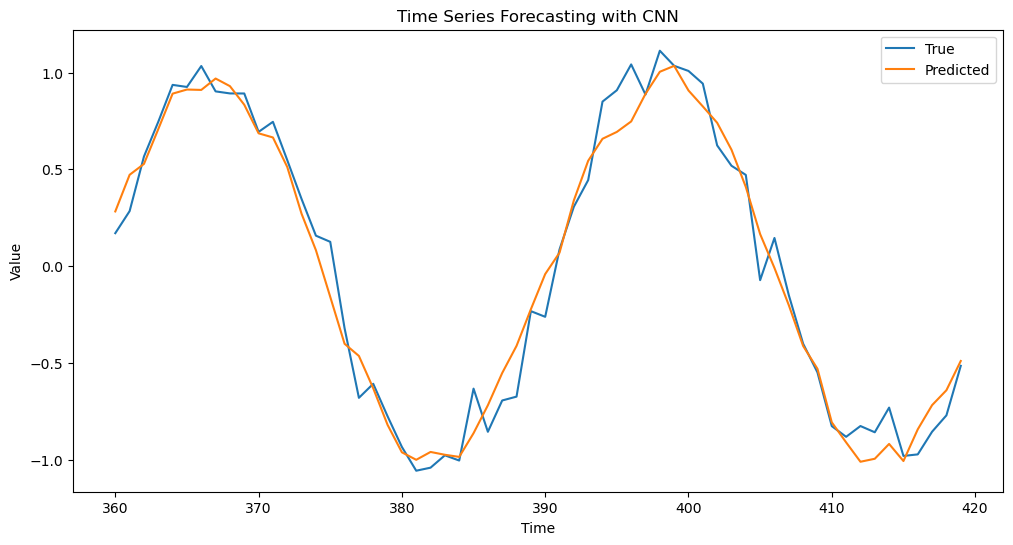

In [9]:
# Plot the original and predicted time series
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, 
label='True')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 
label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecasting with CNN')
plt.show()